## CIFAR10 Dataset 신경망으로 훈련

### imports

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

### 데이터 적재

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)
print(train_images[0].shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
(32, 32, 3)


In [ ]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
train_labels[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

### 데이터 시각화

In [ ]:
train_labels = np.int32(train_labels.flatten())

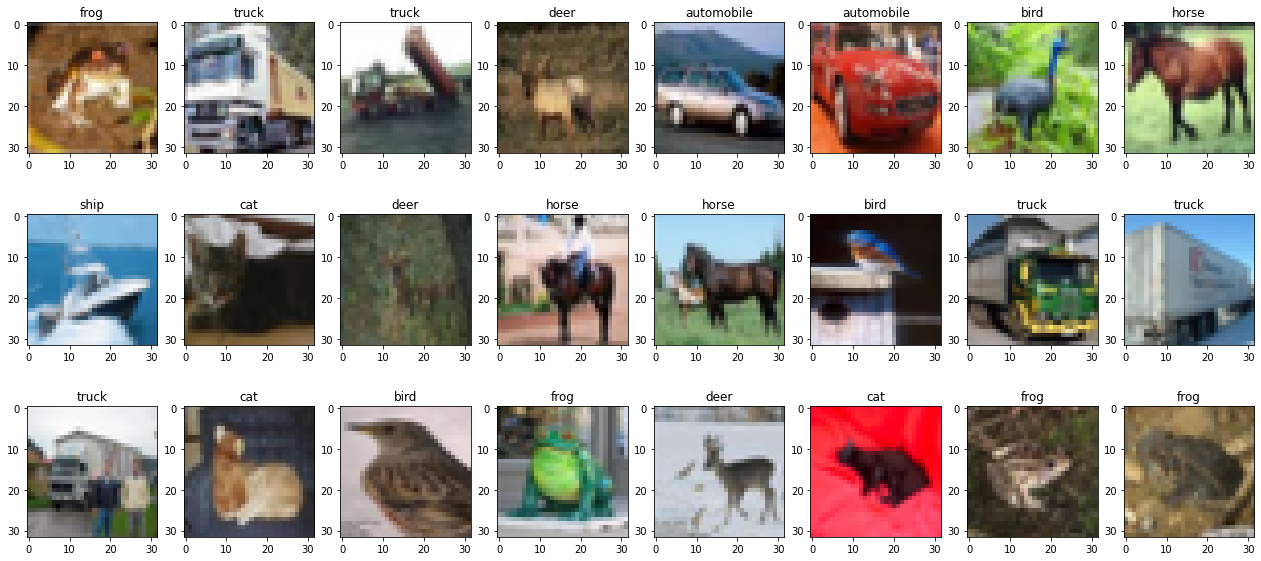

In [ ]:
figure, axes = plt.subplots(figsize=(22, 10), nrows=3, ncols=8)

for i in range(3):
    for j in range(8):
        axes[i][j].imshow(train_images[(i*8)+j])
        axes[i][j].set_title(class_names[train_labels[(i*8)+j]])


### 데이터 전처리

In [ ]:
train_images = np.array(train_images/255.0, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)
test_images = np.array(test_images/255.0, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

In [ ]:
test_oh_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

### 모델 생성

In [ ]:
def build_model():
    tf.keras.backend.clear_session()

    input_tensor = Input(shape=(32, 32, 3))
    x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
                    
    x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)                 
                    
    x = Flatten()(x)
    x = Dropout(rate=0.5)(x)                 
    x = Dense(300, activation="relu")(x)
    x = Dropout(rate=0.3)(x)
    x = Dense(100, activation="relu")(x)
    x = Dropout(rate=0.3)(x)
    output = Dense(10, activation="softmax")(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model

In [ ]:
model = build_model()

### 모델 컴파일

In [ ]:
model.compile(optimizer=Adam(0.001), loss="categorical_crossentropy", metrics=["accuracy"])

### 모델 학습

In [ ]:
batch_size = 32
history = model.fit(x=train_images, y=train_oh_labels, batch_size=batch_size, epochs=30, validation_split=0.2)

Epoch 1/30
1250/1250 [==============================] - 57s 24ms/step - loss: 1.7036 - accuracy: 0.3796 - val_loss: 1.4955 - val_accuracy: 0.4691
Epoch 2/30
1250/1250 [==============================] - 26s 21ms/step - loss: 1.2347 - accuracy: 0.5646 - val_loss: 1.0512 - val_accuracy: 0.6251
Epoch 3/30
1250/1250 [==============================] - 26s 21ms/step - loss: 1.0222 - accuracy: 0.6457 - val_loss: 0.9102 - val_accuracy: 0.6883
Epoch 4/30
1250/1250 [==============================] - 26s 21ms/step - loss: 0.9004 - accuracy: 0.6948 - val_loss: 0.8284 - val_accuracy: 0.7161
Epoch 5/30
1250/1250 [==============================] - 26s 20ms/step - loss: 0.8060 - accuracy: 0.7269 - val_loss: 0.9674 - val_accuracy: 0.6810
Epoch 6/30
1250/1250 [==============================] - 26s 21ms/step - loss: 0.7394 - accuracy: 0.7510 - val_loss: 0.7857 - val_accuracy: 0.7357
Epoch 7/30
1250/1250 [==============================] - 26s 21ms/step - loss: 0.6772 - accuracy: 0.7714 - val_loss: 0.7322 -

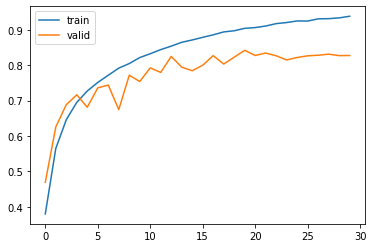

In [ ]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="valid")
plt.legend()

### 테스트 데이터에서 검증

In [ ]:
evaluate_accuracy = model.evaluate(test_images, test_oh_labels, batch_size=batch_size, verbose=1)

313/313 [==============================] - 3s 9ms/step - loss: 0.6434 - accuracy: 0.8238


### Callback 적용(ModelCheckPoint, EarlyStopping, ReduceLROnPlateau)

### 모델 생성 및 컴파일

In [ ]:
model = build_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0     

In [ ]:
model.compile(optimizer=Adam(0.001), loss="categorical_crossentropy", metrics=["accuracy"])

### Callback 정의

In [ ]:
checkpoint_cb = ModelCheckpoint("my_keras_model.h5", save_best_only=True, verbose=1)
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)
reducelr_cb = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, mode="min", verbose=1)

In [ ]:
batch_size = 32
history = model.fit(x=train_images, y=train_oh_labels, batch_size=batch_size, epochs=40, validation_split=0.2, 
                    callbacks=[checkpoint_cb, early_stopping_cb, reducelr_cb])

Epoch 1/40
1250/1250 [==============================] - 31s 24ms/step - loss: 1.7270 - accuracy: 0.3663 - val_loss: 1.6567 - val_accuracy: 0.4408

Epoch 00001: val_loss improved from inf to 1.65672, saving model to my_keras_model.h5
Epoch 2/40
1250/1250 [==============================] - 28s 23ms/step - loss: 1.2361 - accuracy: 0.5613 - val_loss: 1.1919 - val_accuracy: 0.5717

Epoch 00002: val_loss improved from 1.65672 to 1.19195, saving model to my_keras_model.h5
Epoch 3/40
1250/1250 [==============================] - 28s 22ms/step - loss: 1.0279 - accuracy: 0.6424 - val_loss: 1.0462 - val_accuracy: 0.6360

Epoch 00003: val_loss improved from 1.19195 to 1.04619, saving model to my_keras_model.h5
Epoch 4/40
1250/1250 [==============================] - 27s 22ms/step - loss: 0.9087 - accuracy: 0.6920 - val_loss: 0.8407 - val_accuracy: 0.7099

Epoch 00004: val_loss improved from 1.04619 to 0.84072, saving model to my_keras_model.h5
Epoch 5/40
1250/1250 [==============================] - 

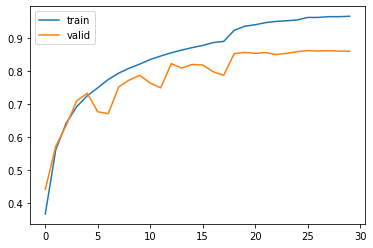

In [ ]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="valid")
plt.legend()

In [ ]:
model.evaluate(test_images, test_oh_labels, batch_size=batch_size, verbose=1)

313/313 [==============================] - 3s 9ms/step - loss: 0.5338 - accuracy: 0.8483


[0.5337657928466797, 0.8482999801635742]

### 필터수, 은닉층 수 추가

In [ ]:
def build_extended_model():
    tf.keras.backend.clear_session()

    input_tensor = Input(shape=(32, 32, 3))
    x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
                    
    x = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # x = MaxPooling2D(pool_size=(2, 2))(x)                 

    x = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)  
                    
    x = Flatten()(x)
    x = Dropout(rate=0.5)(x)                 
    x = Dense(300, activation="relu")(x)
    x = Dropout(rate=0.3)(x)
    x = Dense(100, activation="relu")(x)
    x = Dropout(rate=0.3)(x)
    output = Dense(10, activation="softmax")(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model

### 모델 생성 및 컴파일

In [ ]:
model = build_extended_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0     

In [ ]:
model.compile(optimizer=Adam(0.001), loss="categorical_crossentropy", metrics=["accuracy"])

### Callback 정의

In [ ]:
checkpoint_cb = ModelCheckpoint("my_keras_model.h5", save_best_only=True, verbose=1)
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)
reducelr_cb = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, mode="min", verbose=1)

### 모델 학습

In [ ]:
batch_size = 32
history = model.fit(x=train_images, y=train_oh_labels, batch_size=batch_size, epochs=40, validation_split=0.2, 
                    callbacks=[checkpoint_cb, early_stopping_cb, reducelr_cb])

Epoch 1/40
1250/1250 [==============================] - 44s 34ms/step - loss: 1.9238 - accuracy: 0.2819 - val_loss: 2.1319 - val_accuracy: 0.2787

Epoch 00001: val_loss improved from inf to 2.13189, saving model to my_keras_model.h5
Epoch 2/40
1250/1250 [==============================] - 42s 33ms/step - loss: 1.4577 - accuracy: 0.4533 - val_loss: 1.5571 - val_accuracy: 0.4819

Epoch 00002: val_loss improved from 2.13189 to 1.55712, saving model to my_keras_model.h5
Epoch 3/40
1250/1250 [==============================] - 42s 33ms/step - loss: 1.2312 - accuracy: 0.5560 - val_loss: 1.3039 - val_accuracy: 0.5688

Epoch 00003: val_loss improved from 1.55712 to 1.30385, saving model to my_keras_model.h5
Epoch 4/40
1250/1250 [==============================] - 42s 33ms/step - loss: 1.0752 - accuracy: 0.6200 - val_loss: 1.0629 - val_accuracy: 0.6163

Epoch 00004: val_loss improved from 1.30385 to 1.06294, saving model to my_keras_model.h5
Epoch 5/40
1250/1250 [==============================] - 

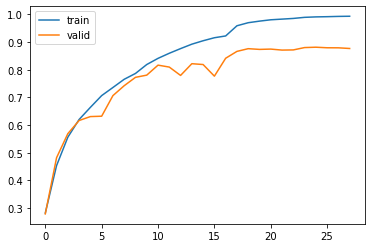

In [ ]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="valid")
plt.legend()

### 테스트 데이터에 대해 평가

In [ ]:
model.evaluate(test_images, test_oh_labels, batch_size=batch_size, verbose=1)

313/313 [==============================] - 4s 12ms/step - loss: 0.5660 - accuracy: 0.8602


[0.5659989714622498, 0.8601999878883362]

### Global Average Pooling 적용





In [ ]:
def build_extended_model():
    tf.keras.backend.clear_session()

    input_tensor = Input(shape=(32, 32, 3))
    x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
                    
    x = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # x = MaxPooling2D(pool_size=(2, 2))(x)                 

    x = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)  

    # x = Flatten()(x)      
    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate=0.5)(x)                 
    x = Dense(300, activation="relu")(x)
    x = Dropout(rate=0.3)(x)
    x = Dense(100, activation="relu")(x)
    x = Dropout(rate=0.3)(x)
    output = Dense(10, activation="softmax")(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model

### 모델 생성 및 컴파일

In [ ]:
model = build_extended_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0     

In [ ]:
model.compile(optimizer=Adam(0.001), loss="categorical_crossentropy", metrics=["accuracy"])

### Callback 정의

In [ ]:
checkpoint_cb = ModelCheckpoint("my_keras_model.h5", save_best_only=True, verbose=1)
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)
reducelr_cb = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, mode="min", verbose=1)

### 모델 학습

In [ ]:
batch_size = 32
history = model.fit(x=train_images, y=train_oh_labels, batch_size=batch_size, epochs=40, validation_split=0.2, 
                    callbacks=[checkpoint_cb, early_stopping_cb, reducelr_cb])

Epoch 1/40
1250/1250 [==============================] - 43s 33ms/step - loss: 1.6409 - accuracy: 0.3811 - val_loss: 1.8103 - val_accuracy: 0.3973

Epoch 00001: val_loss improved from inf to 1.81033, saving model to my_keras_model.h5
Epoch 2/40
1250/1250 [==============================] - 41s 32ms/step - loss: 1.2078 - accuracy: 0.5730 - val_loss: 1.2468 - val_accuracy: 0.5722

Epoch 00002: val_loss improved from 1.81033 to 1.24684, saving model to my_keras_model.h5
Epoch 3/40
1250/1250 [==============================] - 41s 33ms/step - loss: 0.9970 - accuracy: 0.6583 - val_loss: 1.3840 - val_accuracy: 0.5496

Epoch 00003: val_loss did not improve from 1.24684
Epoch 4/40
1250/1250 [==============================] - 41s 33ms/step - loss: 0.8592 - accuracy: 0.7062 - val_loss: 1.0350 - val_accuracy: 0.6700

Epoch 00004: val_loss improved from 1.24684 to 1.03497, saving model to my_keras_model.h5
Epoch 5/40
1250/1250 [==============================] - 41s 33ms/step - loss: 0.7464 - accuracy

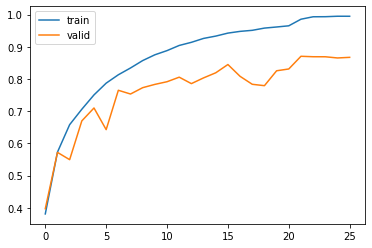

In [ ]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="valid")
plt.legend()

### 테스트 데이터에 대해 평가

In [ ]:
model.evaluate(test_images, test_oh_labels, batch_size=batch_size, verbose=1)

313/313 [==============================] - 4s 12ms/step - loss: 0.5968 - accuracy: 0.8340


[0.5967729091644287, 0.8339999914169312]